# Introduction
This notebook explores and analyzes a dataset containing information about different products from the [extra](https://www.extra.com/en-sa) (Saudi Store). The goal is to gain insights into various aspects such as pricing, discounts, and brand popularity. We'll use data visualization techniques to present some findings.

**Note:** I scraped this dataset using selenium and BeautifulSoup, you can see it on [Kaggle](https://www.kaggle.com/datasets/abdelrahmanahmed110/properties-for-sale-in-egypt).

![Image](https://storage.googleapis.com/twg-content/images/24455_3178_GOOGLE_IMAGE_RESIZE_Banner_tRWM9Th.width-1200.png)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from PIL import Image
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sns.set_style('darkgrid')
plt.style.use('ggplot')

In [2]:
# Read the CSV file into a DataFrame and display it
df = pd.read_csv('extra_items.csv')
df.head()

,Product Name,Brand Name,Category,Post Price,Pre Price,Discount,Basseta Payment,Rating,Item URL,Stats,Image URLs
0,"SAMSUNG Samsung, 65 Inch, 4K UHD 10+, Smart TV",SAMSUNG,Electronics,SAR 2599,5299 Save SAR 2700,50.95% OFF,SAR 112/month For 36 months,4.6 (264),https://www.extra.com/en-sa/electronics/televi...,Resolution (MP): 3840 × 2160 || Panel Type: LE...,https:////media.extra.com/i/aurora/100336490_1...
1,"CLASS PRO Classpro, 65 inch, 4K Smart LED TV, ...",CLASS PRO,Electronics,SAR 1699,2999 Save SAR 1300,43.34% OFF,SAR 73/month For 36 months,NaN,https://www.extra.com/en-sa/electronics/televi...,Resolution (MP): 3840 × 2160 || Panel Type: LE...,https:////media.extra.com/i/aurora/100335174_1...
2,"LG LG, 65 Inch, 4K HDR 10 Pro, Smart TV",LG,Electronics,SAR 2699,6399 Save SAR 3700,57.82% OFF,SAR 116/month For 36 months,NaN,https://www.extra.com/en-sa/electronics/televi...,Resolution (MP): 3840 × 2160 || Panel Type: LE...,https:////media.extra.com/i/aurora/100352522_1...
3,TCL TCL 65-Inch UHD Google LED TV,TCL,Electronics,SAR 2199,2899 Save SAR 700,24.14% OFF,SAR 95/month For 36 months,4.6 (6),https://www.extra.com/en-sa/electronics/televi...,Resolution (MP): 3840 × 2160 || Panel Type: LE...,https:////media.extra.com/i/aurora/100321682_1...
4,"BRATECK Brateck, Steel Full-Motion TV Wall Mou...",BRATECK,Electronics,SAR 129,199 Save SAR 70,35.17% OFF,SAR 6/month For 36 months,NaN,https://www.extra.com/en-sa/electronics/electr...,Functions: Not Applicable || Size: Not applica...,https:////media.extra.com/i/aurora/100281059_1...


In [3]:
# Extract the first image URL using str.extract
df['First Image'] = df['Image URLs'].str.extract(r'(https?://[^\s|]+)')

# Display 5 random images
random_images = random.sample(df['First Image'].dropna().tolist(), min(5, df['First Image'].count()))

# Some Random Images of Products

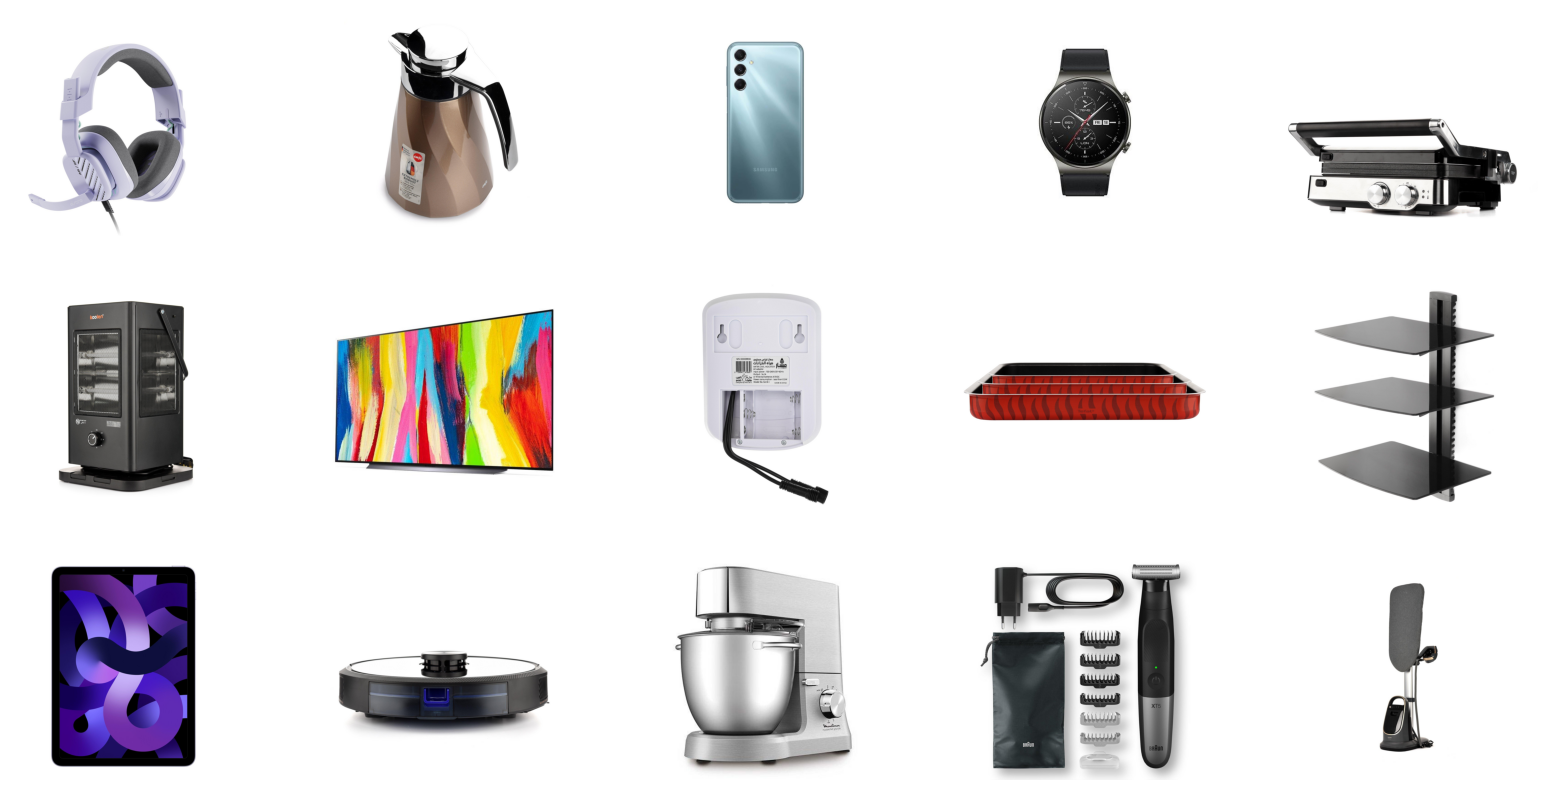

In [4]:
# Display 5 images per row
num_cols = 5
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

for i in range(1, 16):
    image_path = f'{i}.jpg'
    pil_image = Image.open(image_path)
    img = plt.imread(image_path)
    row, col = divmod(i - 1, num_cols)
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

plt.show()

# Data Preprocessing
In this section, we extract new features from some columns and clean the dataset by handling missing values and extracting relevant information to ensure the data is ready for analysis.

In [5]:
# Extract Price in "Post Price" column and convert to numeric values
df['Post Price'] = df['Post Price'].str.extract(r'(\d+)').astype(float)

# Extract Price in "Pre Price" column and convert to numeric values
df['Pre Price'] = df['Pre Price'].str.extract(r'(\d+)').astype(float)

# Extract Saved Money
df['Saved Money'] = df['Pre Price'] - df['Post Price']

# Extract Payment information and convert to numeric values
df['Monthly Payment'] = df['Basseta Payment'].str.extract(r'SAR (\d+)').astype(float)

# Extract Ratings as numeric values
df['Rating'] = df['Rating'].str.extract(r'(\d+\.\d+)').astype(float)

# Extract Warranty Months
df['Warranty Months'] = df['Basseta Payment'].str.extract(r'For (\d+) months').astype(float)

# Extract Discount Percentage
df['Discount Percentage'] = df['Discount'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

# Display the modified DataFrame
df.head()

,Product Name,Brand Name,Category,Post Price,Pre Price,Discount,Basseta Payment,Rating,Item URL,Stats,Image URLs,First Image,Saved Money,Monthly Payment,Warranty Months,Discount Percentage
0,"SAMSUNG Samsung, 65 Inch, 4K UHD 10+, Smart TV",SAMSUNG,Electronics,2599.0,5299.0,50.95% OFF,SAR 112/month For 36 months,4.6,https://www.extra.com/en-sa/electronics/televi...,Resolution (MP): 3840 × 2160 || Panel Type: LE...,https:////media.extra.com/i/aurora/100336490_1...,https:////media.extra.com/i/aurora/100336490_1...,2700.0,112.0,36.0,50.95
1,"CLASS PRO Classpro, 65 inch, 4K Smart LED TV, ...",CLASS PRO,Electronics,1699.0,2999.0,43.34% OFF,SAR 73/month For 36 months,NaN,https://www.extra.com/en-sa/electronics/televi...,Resolution (MP): 3840 × 2160 || Panel Type: LE...,https:////media.extra.com/i/aurora/100335174_1...,https:////media.extra.com/i/aurora/100335174_1...,1300.0,73.0,36.0,43.34
2,"LG LG, 65 Inch, 4K HDR 10 Pro, Smart TV",LG,Electronics,2699.0,6399.0,57.82% OFF,SAR 116/month For 36 months,NaN,https://www.extra.com/en-sa/electronics/televi...,Resolution (MP): 3840 × 2160 || Panel Type: LE...,https:////media.extra.com/i/aurora/100352522_1...,https:////media.extra.com/i/aurora/100352522_1...,3700.0,116.0,36.0,57.82
3,TCL TCL 65-Inch UHD Google LED TV,TCL,Electronics,2199.0,2899.0,24.14% OFF,SAR 95/month For 36 months,4.6,https://www.extra.com/en-sa/electronics/televi...,Resolution (MP): 3840 × 2160 || Panel Type: LE...,https:////media.extra.com/i/aurora/100321682_1...,https:////media.extra.com/i/aurora/100321682_1...,700.0,95.0,36.0,24.14
4,"BRATECK Brateck, Steel Full-Motion TV Wall Mou...",BRATECK,Electronics,129.0,199.0,35.17% OFF,SAR 6/month For 36 months,NaN,https://www.extra.com/en-sa/electronics/electr...,Functions: Not Applicable || Size: Not applica...,https:////media.extra.com/i/aurora/100281059_1...,https:////media.extra.com/i/aurora/100281059_1...,70.0,6.0,36.0,35.17


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4649 entries, 0 to 4648
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         4649 non-null   object 
 1   Brand Name           4619 non-null   object 
 2   Category             4649 non-null   object 
 3   Post Price           4649 non-null   float64
 4   Pre Price            4615 non-null   float64
 5   Discount             3162 non-null   object 
 6   Basseta Payment      4560 non-null   object 
 7   Rating               1848 non-null   float64
 8   Item URL             4649 non-null   object 
 9   Stats                4564 non-null   object 
 10  Image URLs           4649 non-null   object 
 11  First Image          4649 non-null   object 
 12  Saved Money          4615 non-null   float64
 13  Monthly Payment      4560 non-null   float64
 14  Warranty Months      4560 non-null   float64
 15  Discount Percentage  3162 non-null   f

In [7]:
df.describe()

,Post Price,Pre Price,Rating,Saved Money,Monthly Payment,Warranty Months,Discount Percentage
count,4649.000000,4615.000000,1848.000000,4615.000000,4560.000000,4560.0,3162.000000
mean,1606.302000,2033.633803,4.373647,415.611484,70.324561,36.0,28.391148
std,8753.100196,14289.879671,0.353486,6010.097089,377.656889,0.0,17.695500
min,0.000000,8.000000,1.500000,-47963.000000,2.000000,36.0,0.790000
25%,269.000000,36.000000,4.200000,-164.000000,12.000000,36.0,15.010000
50%,559.000000,449.000000,4.400000,99.000000,26.000000,36.0,24.645000
75%,1499.000000,1514.000000,4.600000,300.000000,69.000000,36.0,39.390000
max,559999.000000,899999.000000,4.900000,340000.000000,23956.000000,36.0,79.970000


In [8]:
df.isnull().sum()

Product Name              0
Brand Name               30
Category                  0
Post Price                0
Pre Price                34
Discount               1487
Basseta Payment          89
Rating                 2801
Item URL                  0
Stats                    85
Image URLs                0
First Image               0
Saved Money              34
Monthly Payment          89
Warranty Months          89
Discount Percentage    1487
dtype: int64

In [9]:
# Fill missing values in 'Discount' and 'Rating' with the mean
df['Discount Percentage'].fillna(df['Discount Percentage'].mean(), inplace=True)
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

# Exploratory Data Analysis
Through some visualizations and analyses, we delve into the dataset's characteristics. Key findings include the distribution of categories, brand popularity, and relationships between different variables.

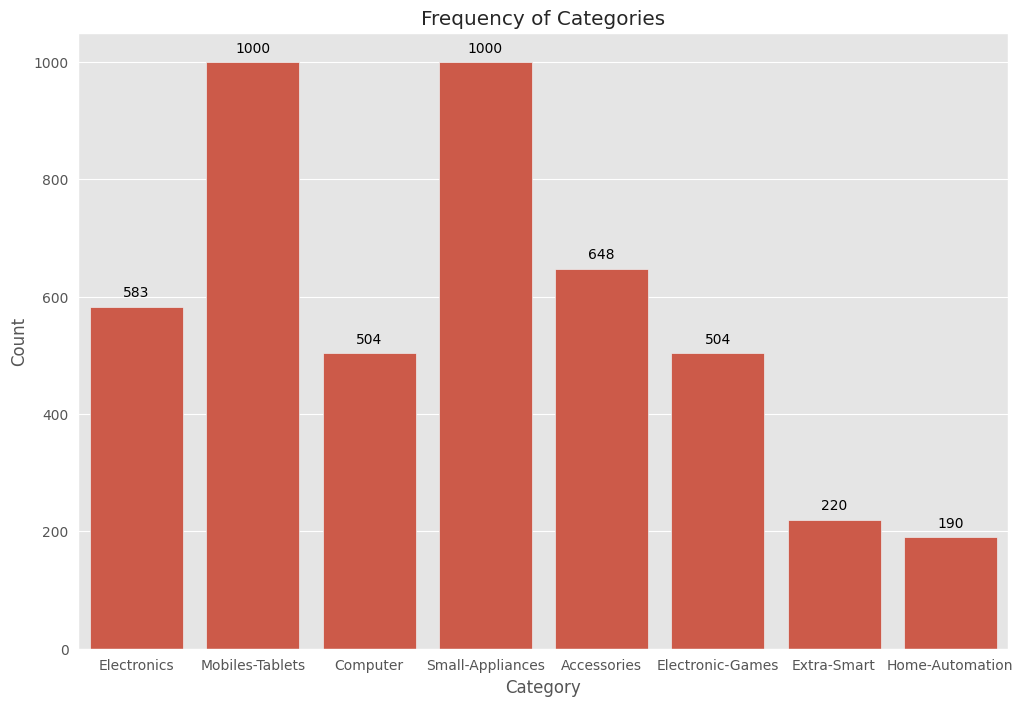

In [10]:
# Create a countplot
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Category', data=df)
plt.title('Frequency of Categories')
plt.xlabel('Category')
plt.ylabel('Count')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')
plt.show()

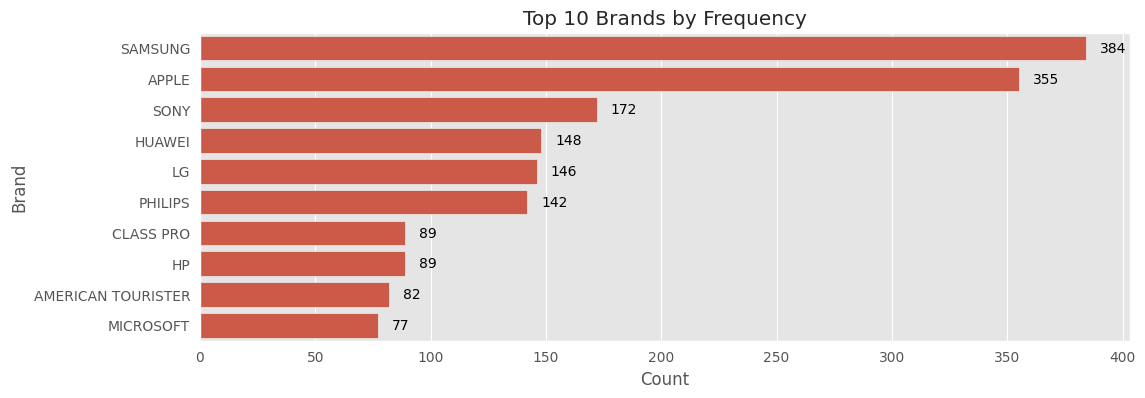

In [11]:
# Get the top 10 brands
top_10_brands = df['Brand Name'].value_counts().nlargest(10).index
df_top_10 = df[df['Brand Name'].isin(top_10_brands)]

# Create a horizontal countplot for the top 10 brands
plt.figure(figsize=(12, 4))
ax2 = sns.countplot(y='Brand Name', data=df_top_10, order=df_top_10['Brand Name'].value_counts().index)
plt.title('Top 10 Brands by Frequency')
plt.xlabel('Count')
plt.ylabel('Brand')

# Add data labels for the bars
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(10, 0), textcoords='offset points', fontsize=10, color='black')
plt.show()

In [12]:
# Calculate the average discount percentage and rating
average_discount = df['Discount Percentage'].mean()
average_rating = df['Rating'].mean()

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'indicator'}, {'type': 'indicator'}]])

# Add the Discount Percentage gauge chart
fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=average_discount,
    domain=dict(x=[0, 0.5], y=[0, 1]),
    title=dict(text="Discount Percentage"),
    gauge=dict(
        axis=dict(range=[0, 100]),
        bar=dict(color="red"),
        steps=[
            dict(range=[0, 100], color="lightgreen")],
        threshold=dict(line=dict(color="black", width=4), thickness=0.75, value=100),
    )
), row=1, col=1)

# Add the Rating gauge chart
fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=average_rating,
    domain=dict(x=[0.5, 1], y=[0, 1]),
    title=dict(text="Rating"),
    gauge=dict(
        axis=dict(range=[0, 10]),
        bar=dict(color="blue"),
        steps=[dict(range=[0, 10], color="lightgreen")],
        threshold=dict(line=dict(color="black", width=4), thickness=0.75, value=10),
    )
), row=1, col=2)

# Update layout and show the subplot
fig.update_layout(height=400, width=800)
fig.show()

In [13]:
from IPython.display import HTML
import humanize

# Generate statistics for Pre Price
avg_pre_price = df['Pre Price'].mean().round(2)
max_pre_price = df['Pre Price'].max().round(2)
min_pre_price = df['Pre Price'].min().round(2)
total_pre_price = df['Pre Price'].sum().round(2)

# Generate statistics for Post Price
avg_post_price = df['Post Price'].mean().round(2)
max_post_price = df['Post Price'].max().round(2)
min_post_price = df['Post Price'].min().round(2)
total_post_price = df['Post Price'].sum().round(2)

# Generate statistics for Saved Money
avg_saved_money = df['Saved Money'].mean().round(2)
max_saved_money = df['Saved Money'].max().round(2)
min_saved_money = df['Saved Money'].min().round(2)
total_saved_money = df['Saved Money'].sum().round(2)

# Generate statistics for Monthly Payment
avg_monthly_payment = df['Monthly Payment'].mean().round(2)
max_monthly_payment = df['Monthly Payment'].max().round(2)
min_monthly_payment = df['Monthly Payment'].min().round(2)
total_monthly_payment = df['Monthly Payment'].sum().round(2)

# Format large numbers
total_pre_price_str = humanize.intword(total_pre_price)
avg_pre_price_str = humanize.intword(avg_pre_price)
max_pre_price_str = humanize.intword(max_pre_price)
min_pre_price_str = humanize.intword(min_pre_price)
total_post_price_str = humanize.intword(total_post_price)
avg_post_price_str = humanize.intword(avg_post_price)
max_post_price_str = humanize.intword(max_post_price)
min_post_price_str = humanize.intword(min_post_price)

total_saved_money_str = humanize.intword(total_saved_money)
avg_saved_money_str = humanize.intword(avg_saved_money)
max_saved_money_str = humanize.intword(max_saved_money)
min_saved_money_str = humanize.intword(min_saved_money)

total_monthly_payment_str = humanize.intword(total_monthly_payment)
avg_monthly_payment_str = humanize.intword(avg_monthly_payment)
max_monthly_payment_str = humanize.intword(max_monthly_payment)
min_monthly_payment_str = humanize.intword(min_monthly_payment)

# Create HTML content with enhanced styling
html_content = f"""
<style>
    .container {{
        text-align: center;
        margin: 0px;
        padding: 0px;
        background-color: #87CEEB;
    }}
    .card {{
        border: 1px solid #ccc;
        border-radius: 10px;
        padding: 20px;
        margin: 20px;
        text-align: center;
        width: 250px;
        display: inline-block;
        background-color: #FF7F20;
        font-size: 18px;
        font-weight: bold;
        color: #000000;
    }}
</style>


<div class="container">
    <h2 style="font-size: 24px; font-weight: bold; color: #000000;">Some General Stats (currency SAR)</h2>
</div>

<div class="card">
    <h3>Total Pre Price</h3>
    <p>{total_pre_price_str}</p>
</div>
<div class="card">
    <h3>Avg Pre Price</h3>
    <p>{avg_pre_price_str}</p>
</div>
<div class="card">
    <h3>Max Pre Price</h3>
    <p>{max_pre_price_str}</p>
</div>
<div class="card">
    <h3>Min Pre Price</h3>
    <p>{min_pre_price_str}</p>
</div>
<div class="card">
    <h3>Total Post Price</h3>
    <p>{total_post_price_str}</p>
</div>
<div class="card">
    <h3>Avg Post Price</h3>
    <p>{avg_post_price_str}</p>
</div>
<div class="card">
    <h3>Max Post Price</h3>
    <p>{max_post_price_str}</p>
</div>
<div class="card">
    <h3>Min Post Price</h3>
    <p>{min_post_price_str}</p>
</div>

<div class="card">
    <h3>Total Saved Money</h3>
    <p>{total_saved_money_str}</p>
</div>
<div class="card">
    <h3>Avg Saved Money</h3>
    <p>{avg_saved_money_str}</p>
</div>
<div class="card">
    <h3>Max Saved Money</h3>
    <p>{max_saved_money_str}</p>
</div>
<div class="card">
    <h3>Min Saved Money</h3>
    <p>{min_saved_money_str}</p>
</div>

<div class="card">
    <h3>Total Monthly Payment</h3>
    <p>{total_monthly_payment_str}</p>
</div>
<div class="card">
    <h3>Avg Monthly Payment</h3>
    <p>{avg_monthly_payment_str}</p>
</div>
<div class="card">
    <h3>Max Monthly Payment</h3>
    <p>{max_monthly_payment_str}</p>
</div>
<div class="card">
    <h3>Min Monthly Payment</h3>
    <p>{min_monthly_payment_str}</p>
</div>
"""

# Display HTML content in the notebook
HTML(html_content)

# Made by: Abdelrahman Eldaba 👨‍💻

Check out my portfolio [Here](https://www.linkedin.com/posts/abdelrahman-eldaba-739805192_datascience-dataanalysis-webscraping-activity-7156428468711219201-gtWA/) 🌟

Connect with me on [LinkedIn](https://www.linkedin.com/in/abdelrahman-eldaba-739805192/) 🌐

Look at my [GitHub](https://github.com/Abdelrahman47-code) 🚀